<a href="https://colab.research.google.com/github/Tego-Chang/Practice-NoCodeLowCode-NLP/blob/main/NLP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

In [2]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [5]:
from pathlib import Path
import spacy

In [3]:
#grab text
# !rm *.txt
!wget https://raw.githubusercontent.com/Tego-Chang/Practice-NoCodeLowCode-NLP/main/Hemingway-old-man-see.txt
!wget https://raw.githubusercontent.com/Tego-Chang/Practice-NoCodeLowCode-NLP/main/ansel_adams_wikipedia.txt
!wget https://raw.githubusercontent.com/Tego-Chang/Practice-NoCodeLowCode-NLP/main/hemingway-sun-also-rises.txt

--2021-12-09 02:17:15--  https://raw.githubusercontent.com/Tego-Chang/Practice-NoCodeLowCode-NLP/main/Hemingway-old-man-see.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134520 (131K) [text/plain]
Saving to: ‘Hemingway-old-man-see.txt’

Hemingway-old-man-s 100%[===================>] 131.37K  --.-KB/s    in 0.02s   

2021-12-09 02:17:15 (5.88 MB/s) - ‘Hemingway-old-man-see.txt’ saved [134520/134520]

--2021-12-09 02:17:15--  https://raw.githubusercontent.com/Tego-Chang/Practice-NoCodeLowCode-NLP/main/ansel_adams_wikipedia.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP r

In [6]:
oms_text = Path('Hemingway-old-man-see.txt').read_text()
sar_text = Path('hemingway-sun-also-rises.txt').read_text()
aa_text = Path('ansel_adams_wikipedia.txt').read_text()

# EDA
## Document Similiarity Check by Applying Spacy

In [7]:
nlp = spacy.load("en_core_web_lg")

In [8]:
#how similar is old man and the see to the sun also rise?
oms_book = nlp(Path('Hemingway-old-man-see.txt').read_text())
sar_book = nlp(Path('hemingway-sun-also-rises.txt').read_text())
aa_bio = nlp(Path('ansel_adams_wikipedia.txt').read_text())

In [13]:
type (oms_text)
type(oms_book)

spacy.tokens.doc.Doc

In [15]:
#both hemingway books are highly similar
oms_book.similarity(sar_book)


0.9886731764132038

In [17]:
#this book is less similar to a wikipedia article, but still similar why?
oms_book.similarity(aa_bio)

0.9125037193825526

# Word Visualizations


In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!python -m textblob.download_corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [19]:
#remove stop words
from textblob import TextBlob
from nltk.corpus import stopwords

In [20]:
stop_words = stopwords.words('english')

In [21]:
oms_blob = TextBlob(Path('Hemingway-old-man-see.txt').read_text())

In [25]:
#without stop word removal
oms_count = oms_blob.word_counts.items()
oms_count
# len(oms_count)

dict_items([('the', 2316), ('old', 248), ('man', 262), ('and', 1259), ('sea', 43), ('he', 1165), ('was', 435), ('an', 29), ('who', 26), ('fished', 3), ('alone', 11), ('in', 359), ('a', 397), ('skiff', 48), ('gulf', 5), ('stream', 3), ('had', 203), ('gone', 21), ('eighty-four', 2), ('days', 12), ('now', 173), ('without', 18), ('taking', 4), ('fish', 285), ('first', 30), ('forty', 5), ('boy', 100), ('been', 43), ('with', 205), ('him', 230), ('but', 233), ('after', 33), ('s', 73), ('parents', 1), ('told', 11), ('that', 299), ('definitely', 1), ('finally', 6), ('salao', 1), ('which', 14), ('is', 191), ('worst', 1), ('form', 2), ('of', 540), ('unlucky', 1), ('at', 99), ('their', 42), ('orders', 1), ('another', 21), ('boat', 39), ('caught', 7), ('three', 12), ('good', 47), ('week', 2), ('it', 494), ('made', 48), ('sad', 4), ('to', 454), ('see', 67), ('come', 58), ('each', 30), ('day', 25), ('his', 446), ('empty', 2), ('always', 16), ('went', 35), ('down', 89), ('help', 10), ('carry', 4), ('e

In [26]:
def remove_stop(words):
    no_stop = []
    for word in words:
        if word[0] not in stop_words:
            no_stop.append(word[0])
    return no_stop

In [31]:
no_stop_words = remove_stop(oms_count)
no_stop_words
len(no_stop_words)
type(no_stop_words)
no_stop_words[:10]

['old',
 'man',
 'sea',
 'fished',
 'alone',
 'skiff',
 'gulf',
 'stream',
 'gone',
 'eighty-four']

# Word Cloud

In [32]:
from wordcloud import WordCloud

In [34]:
word_cloud_text = ' '.join(no_stop_words)
wordcloud = WordCloud().generate(word_cloud_text)

(-0.5, 399.5, 199.5, -0.5)

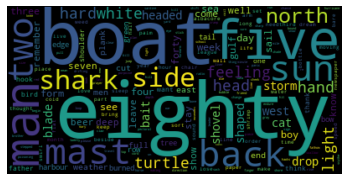

In [35]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Cloud-based NoCode-LowCode Tool


In [36]:
import pandas as pd
df = pd.DataFrame(no_stop_words, columns=["old-man-sea-words"])
df.head()

,old-man-sea-words
0,old
1,man
2,sea
3,fished
4,alone


In [37]:
df.to_csv("old-man-sea-words.csv",index=False)

In [38]:
from plotly.offline import iplot
import plotly.graph_objs as go

In [39]:
fig = go.Figure(data=go.Bar(y=no_stop_words))
iplot(fig)